In [1]:
from IPython.display import Markdown, display

display(Markdown("../../../../landmarks-project/README.md"))


## Project Overview

Welcome to the Convolutional Neural Networks (CNN) project!
In this project, you will learn how to build a pipeline to process real-world, user-supplied images.
Given an image, your algorithm will predict the most likely locations where the image was taken.

![Sample Output](landmark_project/images/sample_landmark_output.png)

By completing this lab, you demonstrate your understanding of the challenges involved in piecing together a series of models designed to perform various tasks in a data processing pipeline.

Each model has its strengths and weaknesses, and engineering a real-world application often involves solving many problems without a perfect answer.


## Project Instructions

### Instructions

1. Clone the repository and navigate to the downloaded folder.
	
	```	
		git clone https://github.com/udacity/nd101-c2-landmarks-starter.git
		cd nd101-c2-landmarks-starter/landmark_project
	```
2. Download the dataset included below in the "Dataset Info" section. Note that this will be provided for you if using the workspace in the Udacity classroom.
3. Open a terminal window and navigate to the project folder. Open the notebook and follow the instructions.
	
	```
		jupyter notebook landmark.ipynb
	```

__NOTE:__ While some code has already been implemented to get you started, you will need to implement additional functionality to successfully answer all of the questions included in the notebook. __Unless requested, do not modify code that has already been included.__

__NOTE:__ In the notebook, you will need to train CNNs in PyTorch.  If your CNN is taking too long to train, feel free to pursue one of the options under the section __Accelerating the Training Process__ below.



## (Optionally) Accelerating the Training Process 

If your code is taking too long to run, you will need to either reduce the complexity of your chosen CNN architecture or switch to running your code on a GPU.  If you'd like to use a GPU, you can spin up an instance of your own:

### Classroom GPU Workspace

A GPU workspace is available from within the Udacity classroom. Make sure you save your notebook and any related files, then click on the "Enable" button next to the GPU hours.

### Amazon Web Services

You can also use Amazon Web Services to launch an EC2 GPU instance.

## Evaluation

Your project will be reviewed by a Udacity reviewer against the CNN project rubric (linked in the classroom).  Review the rubric thoroughly and self-evaluate your project before submission.  All criteria found in the rubric must meet specifications for you to pass.

## Project Submission

Your submission should consist of the github link to your repository.  Your repository should contain:
- The `landmark.ipynb` file with fully functional code, all code cells executed and displaying output, and all questions answered.
- An HTML or PDF export of the project notebook with the name `report.html` or `report.pdf`.

Please do __NOT__ include any of the project data sets provided in the `landmark_images/` folder.

### Ready to submit your project?

Click on the "Submit Project" button in the classroom and follow the instructions to submit!

## Dataset Info

The landmark images are a subset of the Google Landmarks Dataset v2. If you are using the
classroom workspace, the dataset is provided therein; otherwise it can be obtained using
[this link](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).

You can find license information for the full dataset [on Kaggle](https://www.kaggle.com/google/google-landmarks-dataset).


# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import os
import torch
import numpy as np

import torchvision
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

data_dir = '../landmark_images'
img_size = (32, 32)


data_transform = transforms.Compose([transforms.Resize(img_size), 
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])


train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)


num_workers=0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation = 20%
valid_size = 0.2

num_train = len(train_data)
num_test = len(test_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

classes = train_data.classes

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


In [2]:
def pretty_classes(classes):
    return [f.split(".")[1] for f in classes]
classes = pretty_classes(classes)

In [3]:
print(train_dir, test_dir)

print(num_train, " ", num_test)


../landmark_images/train/ ../landmark_images/test/
4996   1250


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
- I simply stretched to a square and made them as small as possible in order to train fast
- Yes, slightly, by a small random rotation to improve tolerance to small rotations in photos 

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


In [5]:
# obtain one batch of training images

def previewSomeImages(loader):
    dataiter = iter(loader)
    #dataiter = iter(test_loader)
    images, labels = dataiter.next()
    images = images.numpy() # convert images to numpy for display


    print(images[0].shape)
    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 8))
    # display some images
    images_to_display = 10
    for idx in np.arange(images_to_display):
        ax = fig.add_subplot(2, int(images_to_display/2), idx+1, xticks=[], yticks=[])
        imshow(images[idx])
        ax.set_title(classes[int(labels[idx])])
    
    


(3, 32, 32)


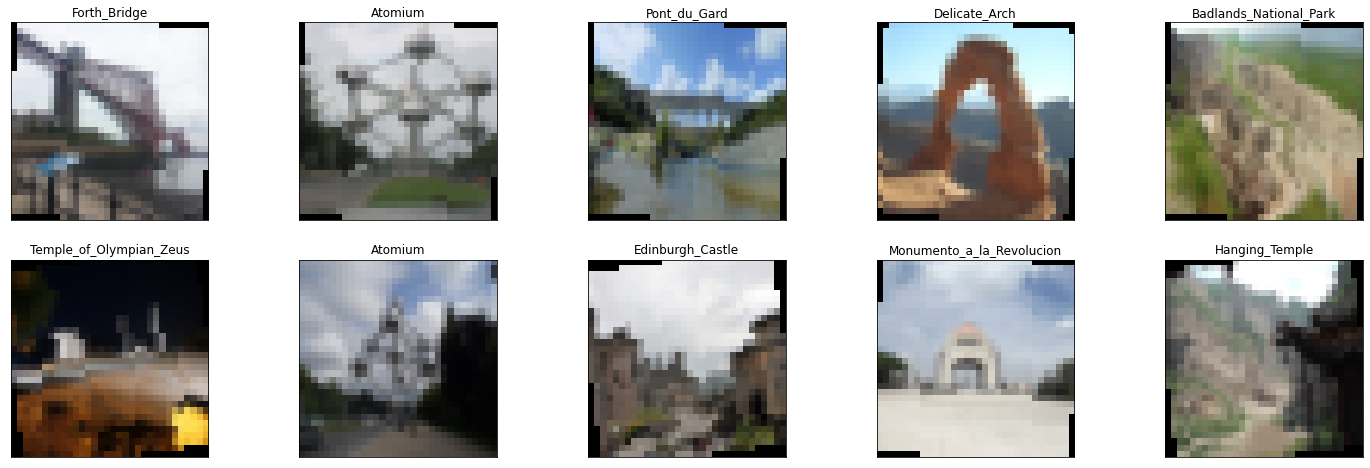

In [6]:
previewSomeImages(train_loader)


### Initialize use_cuda variable

In [8]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()
use_cuda

True

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [11]:
from torch import nn
import torch.optim as optim

## TODO: select loss function
criterion_scratch = nn.NLLLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    return optim.SGD(model.parameters(), lr=0.05)
    
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

    
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        self.max_linear_size = img_size[0]*img_size[1]*2
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(self.max_linear_size, 1024)
        self.fc2 = nn.Linear(1024, 50)
        
        self.dropout = nn.Dropout(p=0.2)
        
    
    def forward(self, x):
        ## Define forward behavior

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.reshape(x.shape[0], self.max_linear_size) # flatten

        x = self.dropout(F.relu(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  

I decided to use 3 convolutional layers as I expect to detect the features that I need in order to identify landmarks already at a lower level.
I'm pooling with maxpool to reduce imagesize by four at each convolutional layer, at the same time I extend the depth of the layer by two, therefore keeping fully connected layers small enough and hence not increasing parameters too much.

I use dropout in the fc-layer to reduce risk of overfitting.
And finally I apply log-softmax to get logarithmic class-probabilities for our classification task, which goes well together with the negative log likelyhood loss criterion.

For the optimization I work with the SGD optimizer to train fast with simple setup.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [3]:
import sys

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        print("Training...")
        model.train()
        num_batches_train = len(loaders['train'])
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            sys.stdout.write("\rProgress:" + str(100 * batch_idx/float(num_batches_train))[:4] + "%")

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
        
        print()
        print("Validation...")

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        num_batches_valid = len(loaders['valid'])
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            sys.stdout.write("\rProgress:" + str(100 * batch_idx/float(num_batches_valid))[:4] + "%")

            ## TODO: update average validation loss 
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))


        print()            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f})!'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss


        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [10]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    # for every Linear layer in a model
    # m.weight.data shoud be taken from a normal distribution
    # m.bias.data should be 0
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 1 	Training Loss: 3.892308 	Validation Loss: 3.831780
Validation loss decreased (inf --> 3.831780)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 2 	Training Loss: 3.725636 	Validation Loss: 3.691836
Validation loss decreased (3.831780 --> 3.691836)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 3 	Training Loss: 3.523853 	Validation Loss: 3.513452
Validation loss decreased (3.691836 --> 3.513452)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 4 	Training Loss: 3.346672 	Validation Loss: 3.362794
Validation loss decreased (3.513452 --> 3.362794)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 5 	Training Loss: 3.188913 	Validation Loss: 3.299458
Validation loss decreased (3.362794 --> 3.299458)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 6 	Training Loss: 3.058075 	Validation Loss: 3.291004
Validation loss decreased (3.299458 --> 3.291004

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [17]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 25

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 1 	Training Loss: 3.909758 	Validation Loss: 3.906035
Validation loss decreased (inf --> 3.906035)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 2 	Training Loss: 3.849644 	Validation Loss: 3.799575
Validation loss decreased (3.906035 --> 3.799575)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 3 	Training Loss: 3.681428 	Validation Loss: 3.639861
Validation loss decreased (3.799575 --> 3.639861)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 4 	Training Loss: 3.487747 	Validation Loss: 3.472609
Validation loss decreased (3.639861 --> 3.472609)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 5 	Training Loss: 3.356598 	Validation Loss: 3.397127
Validation loss decreased (3.472609 --> 3.397127)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 6 	Training Loss: 3.258259 	Validation Loss: 3.325356
Validation loss decreased (3.397127 --> 3.325356

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    num_batches_test = len(loaders['test'])
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        sys.stdout.write("\rProgress:" + str(100 * batch_idx/float(num_batches_test))[:4] + "%")

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
    
    print()
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Progress:98.4%
Test Loss: 3.030351


Test Accuracy: 26% (337/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [29]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


import os
import torch
import numpy as np

import torchvision
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

data_dir = '../landmark_images'
img_size = (224, 224)


data_transform = transforms.Compose([transforms.Resize(img_size), 
                                     transforms.ToTensor()
                                     ])


train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)


num_workers=0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation = 20%
valid_size = 0.2

num_train = len(train_data)
num_test = len(test_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

classes = pretty_classes(train_data.classes)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


(3, 224, 224)


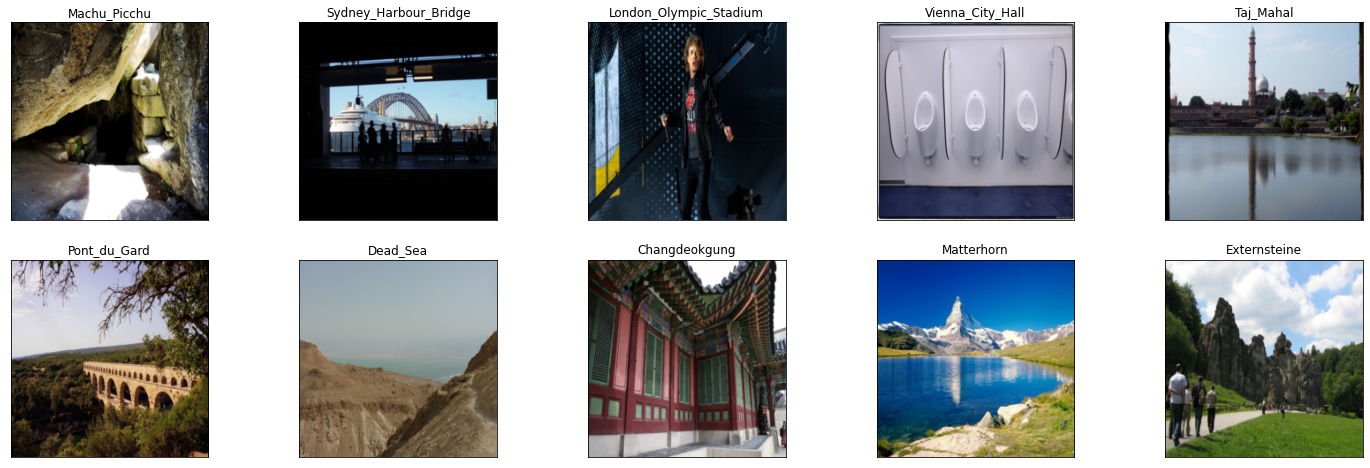

In [30]:
previewSomeImages(loaders_transfer['train'])

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [15]:
from torch import nn
import torch.optim as optim

## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.SGD(model.classifier.parameters(), lr=0.05)

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
## TODO: Specify model architecture
model_transfer = models.vgg16(pretrained=True)

# freeze all parameters, I will replace the last FC layer from the classifier later
for param in model_transfer.features.parameters():
    param.requires_grad = False

model_transfer.classifier[6] = nn.Linear(in_features=4096, out_features=50)

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
I'm using a pretrained VGG16 Model trained on ImageNet dataset. I think it will be sufficient to apply the EndOfConvNet transfer learning strategy, as my dataset is small and the dataset seems to be similar (not so much but enough I would say) to the ImageNet problem.
To do so, I fixed all feature layers in VGG16 and just exchanged last layer with fully connected one (from 4096 to 50 nodes) to match the 50 classes we expect. I then configured the classifier to be retrained with the new data, this is a mix of StartOfConvNet and EndOfConvNet strategy that seems for me suitable in this case.


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

model_transfer = train(10, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer),
                      criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 1 	Training Loss: 2.131840 	Validation Loss: 1.649812
Validation loss decreased (inf --> 1.649812)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 2 	Training Loss: 1.110298 	Validation Loss: 1.375824
Validation loss decreased (1.649812 --> 1.375824)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 3 	Training Loss: 0.565541 	Validation Loss: 1.331167
Validation loss decreased (1.375824 --> 1.331167)!
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 4 	Training Loss: 0.262808 	Validation Loss: 1.353587
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 5 	Training Loss: 0.144607 	Validation Loss: 1.478739
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 6 	Training Loss: 0.080077 	Validation Loss: 1.501544
Training...
Progress:99.5%
Validation...
Progress:98.0%
Epoch: 7 	Training Loss: 0.045911 	Validation Loss: 1.495388
Training...
Progress:99.5%
Valida

In [19]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Progress:98.4%
Test Loss: 1.125432


Test Accuracy: 69% (866/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [31]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def get_predicted_class_item(class_index, probability, print_probs = False):
    item = classes[class_index]
    return item + ": {:5.2f}%".format(probability*100) if print_probs else item

def get_predicted_classes(probabilities, k, print_probs = False):
    max_val, max_indx = torch.topk(probabilities, 3, dim=0)
    return [get_predicted_class_item(i, j, print_probs) for i, j in zip(max_indx, max_val)]

def predict_landmarks(img_path, k, print_probs = False, return_img_tensor = False):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    img = Image.open(img_path)
    img_tensor = data_transform(img)
    img_input = torch.unsqueeze(img_tensor, 0)
    img_output = model_transfer(img_input)
    img_probabilities = torch.softmax(img_output, dim=1).squeeze(0)
    predicted_landmarks = get_predicted_classes(img_probabilities, k, print_probs)
    if return_img_tensor:
        return predicted_landmarks, img_tensor
    else:
        return predicted_landmarks


# test on a sample image
predict_landmarks('../landmark_images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden_Gate_Bridge', 'Forth_Bridge', 'Brooklyn_Bridge']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

Your image probably shows one of the following landmarks with given confidence:
- Machu_Picchu: 99.38%
- Ljubljana_Castle:  0.23%
- Hanging_Temple:  0.18%


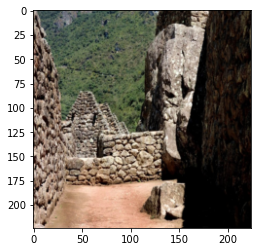

In [32]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks, img_tensor = predict_landmarks(img_path, 3, print_probs=True, return_img_tensor=True)
    
    ## TODO: display image and display landmark predictions
    imshow(img_tensor)
    print("Your image probably shows one of the following landmarks with given confidence:")
    for landmark in predicted_landmarks:
        print("-", landmark)
    
    

# test on a sample image
suggest_locations('../landmark_images/test/41.Machu_Picchu/11645077225a120b.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
My approach seem to work well with images that show clearly the landmark, this works better than expected (~ 99%).
In contrast, disturbing elements such as people or other unrelated buildings seem to trouble the recognition. I also observed that rotated images are not well recognized.

To overcome this one could

1. Apply a pure StartOfConvNet strategy (to train more higher level features of the landmarks)
1. Try to augment the data by rotating and maybe clipping the images
1. Find more images for training
1. Tune the learning rate and try more epochs

Your image probably shows one of the following landmarks with given confidence:
- Matterhorn: 99.94%
- Machu_Picchu:  0.02%
- Terminal_Tower:  0.01%


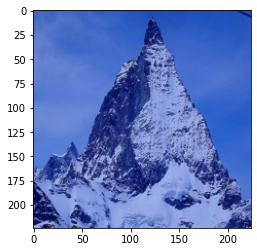

In [33]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

suggest_locations('../priv-images/m.jpeg')

Your image probably shows one of the following landmarks with given confidence:
- Golden_Gate_Bridge: 52.98%
- Forth_Bridge: 45.88%
- Brooklyn_Bridge:  0.57%


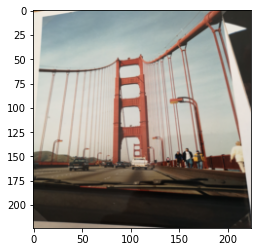

In [34]:
suggest_locations('../priv-images/s2.jpg')

Your image probably shows one of the following landmarks with given confidence:
- Golden_Gate_Bridge: 75.83%
- Brooklyn_Bridge: 18.14%
- Forth_Bridge:  4.87%


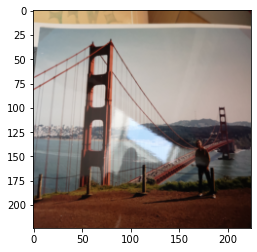

In [35]:
suggest_locations('../priv-images/s3.jpg')

Your image probably shows one of the following landmarks with given confidence:
- Terminal_Tower: 38.76%
- Washington_Monument: 17.96%
- Dead_Sea: 12.19%


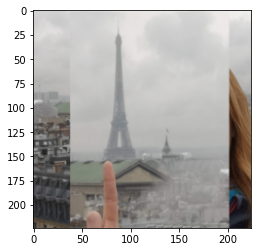

In [36]:
suggest_locations('../priv-images/p3.jpg')